In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

plt.style.use('seaborn-darkgrid')

/tmp/ipykernel_30/3101321112.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


### Гармонический осциллятор без трения

#### Уравнение движения:
$$
\ddot{x} + \omega^2 x = 0
$$
Здесь 𝜔 — угловая частота осциллятора.

- **Особая точка**: x = 0, v = 0 - точка равновесия.
- **Устойчивость**: устойчивая, замкнутые траектории на фазовой плоскости.
- **Интеграл энергии**: 
$$
E = \frac{1}{2}m\dot{x}^2 + \frac{1}{2}kx^2
$$
- **Потенциальная функция**: 
$$
V(x) = \frac{1}{2}kx^2
$$

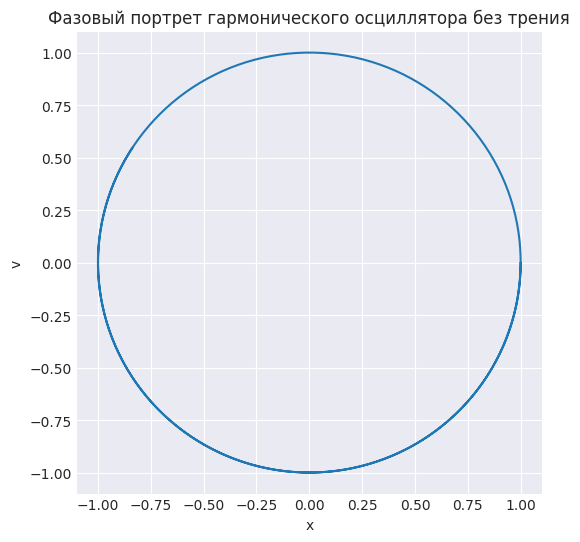

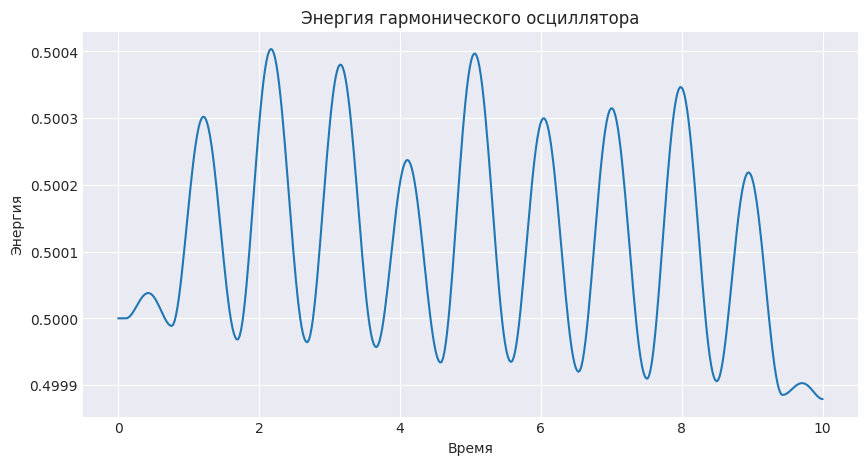

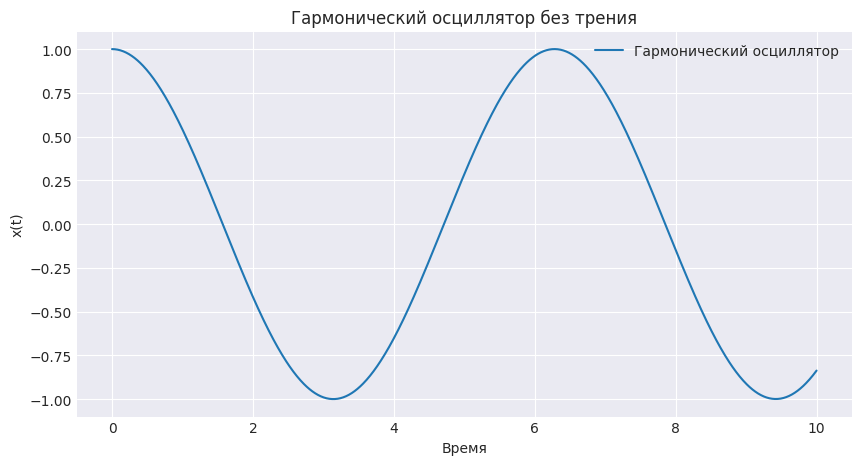

In [2]:
def harmonic_oscillator(t, y, omega):
    x, v = y
    dxdt = v
    dvdt = -omega**2 * x
    return [dxdt, dvdt]


omega = 1.0  # Угловая частота
t_span = (0, 10)  # Временной интервал
t_vals = np.linspace(t_span[0], t_span[1], 500)  # Временные точки

y0 = [1.0, 0.0]  # x(0) = 1, v(0) = 0

sol = solve_ivp(harmonic_oscillator, t_span, y0, args=(omega,), dense_output=True)
x_vals, v_vals = sol.sol(t_vals)

# Построение фазового портрета
plt.figure(figsize=(6, 6))
plt.plot(x_vals, v_vals)
plt.xlabel('x')
plt.ylabel('v')
plt.title('Фазовый портрет гармонического осциллятора без трения')
plt.grid(True)
plt.show()

# Энергия
m = 1  # Масса
k = omega**2  # Коэффициент жесткости
energy = 0.5 * m * v_vals**2 + 0.5 * k * x_vals**2

plt.figure(figsize=(10, 5))
plt.plot(t_vals, energy)
plt.xlabel('Время')
plt.ylabel('Энергия')
plt.title('Энергия гармонического осциллятора')
plt.grid(True)
plt.show()

# Построение графика x(t)
t_vals = np.linspace(t_span[0], t_span[1], 1000)
x_vals = sol.sol(t_vals)[0]

plt.figure(figsize=(10, 5))
plt.plot(t_vals, x_vals, label='Гармонический осциллятор')
plt.xlabel('Время')
plt.ylabel('x(t)')
plt.title('Гармонический осциллятор без трения')
plt.legend()
plt.show()

### Гармонический осциллятор с трением

#### Уравнение движения:
$$
\ddot{x} + 2\gamma\dot{x} + \omega^2 x = 0
$$
Здесь 𝛾 — коэффициент демпфирования.

- **Особая точка**: x = 0, v = 0.
- **Устойчивость**: устойчивая, траектории стремятся к точке равновесия.
- **Энергия**: уменьшается со временем из-за трения.

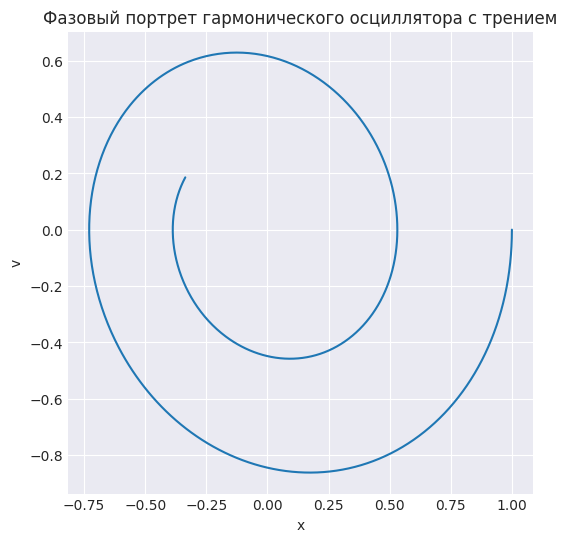

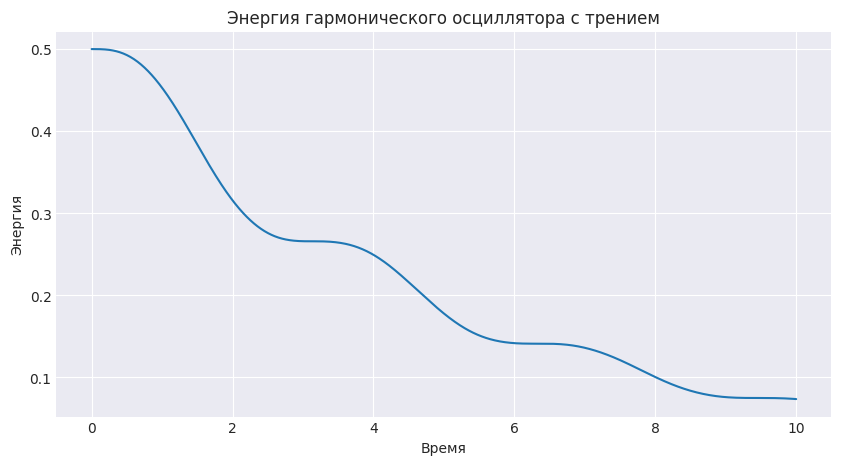

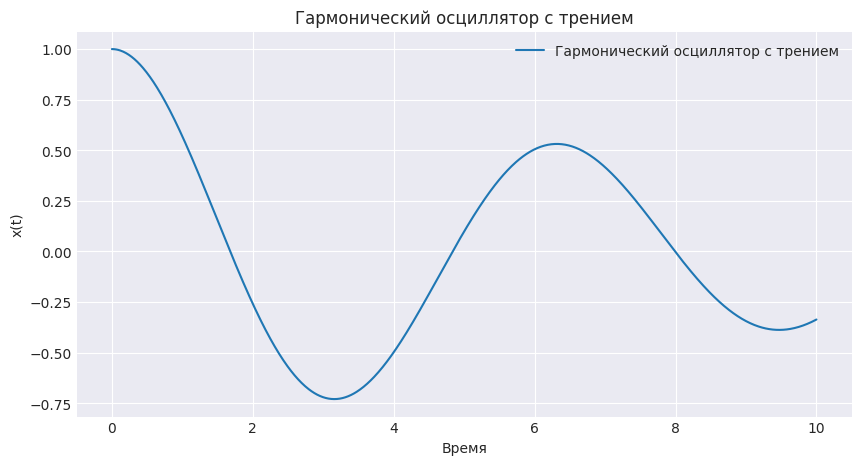

In [3]:
def damped_harmonic_oscillator(t, y, omega, gamma):
    x, v = y
    dxdt = v
    dvdt = -2 * gamma * v - omega**2 * x
    return [dxdt, dvdt]

gamma = 0.1  # Коэффициент трения

sol = solve_ivp(damped_harmonic_oscillator, t_span, y0, args=(omega, gamma), dense_output=True)
x_vals, v_vals = sol.sol(t_vals)

# Построение фазового портрета
plt.figure(figsize=(6, 6))
plt.plot(x_vals, v_vals)
plt.xlabel('x')
plt.ylabel('v')
plt.title('Фазовый портрет гармонического осциллятора с трением')
plt.grid(True)
plt.show()

# Энергия
energy = 0.5 * m * v_vals**2 + 0.5 * k * x_vals**2

plt.figure(figsize=(10, 5))
plt.plot(t_vals, energy)
plt.xlabel('Время')
plt.ylabel('Энергия')
plt.title('Энергия гармонического осциллятора с трением')
plt.grid(True)
plt.show()

# Построение графика x(t)
x_vals = sol.sol(t_vals)[0]

plt.figure(figsize=(10, 5))
plt.plot(t_vals, x_vals, label='Гармонический осциллятор с трением')
plt.xlabel('Время')
plt.ylabel('x(t)')
plt.title('Гармонический осциллятор с трением')
plt.legend()
plt.show()

### Ангармонический осциллятор без трения

#### Уравнение движения:
$$
\ddot{x} + \omega^2 x + \alpha x^3 = 0
$$
Здесь 𝛼 — коэффициент нелинейности.

- **Особая точка**: x = 0, v = 0.
- **Устойчивость**: более сложная динамика, возможны бифуркации и хаотическое поведение.

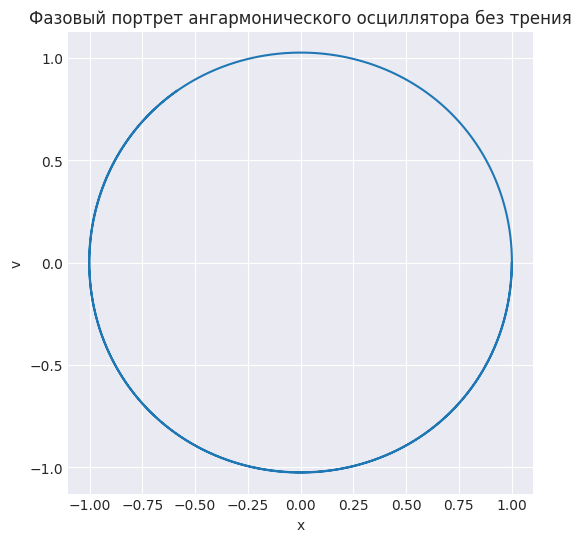

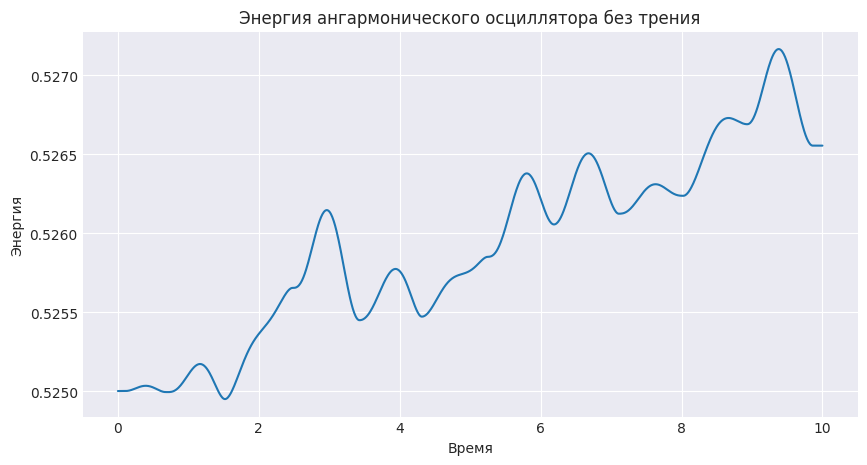

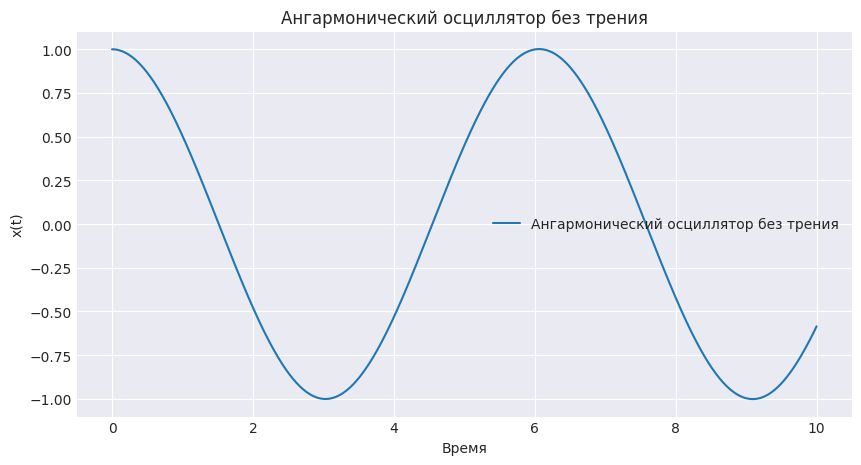

In [4]:
def anharmonic_oscillator(t, y, omega, alpha):
    x, v = y
    dxdt = v
    dvdt = -omega**2 * x - alpha * x**3
    return [dxdt, dvdt]

alpha = 0.1  # Коэффициент нелинейности

sol = solve_ivp(anharmonic_oscillator, t_span, y0, args=(omega, alpha), dense_output=True)
x_vals, v_vals = sol.sol(t_vals)

# Построение фазового портрета
plt.figure(figsize=(6, 6))
plt.plot(x_vals, v_vals)
plt.xlabel('x')
plt.ylabel('v')
plt.title('Фазовый портрет ангармонического осциллятора без трения')
plt.grid(True)
plt.show()

# Энергия
energy = 0.5 * m * v_vals**2 + 0.5 * k * x_vals**2 + 0.25 * alpha * x_vals**4

plt.figure(figsize=(10, 5))
plt.plot(t_vals, energy)
plt.xlabel('Время')
plt.ylabel('Энергия')
plt.title('Энергия ангармонического осциллятора без трения')
plt.grid(True)
plt.show()

# Построение графика x(t)
x_vals = sol.sol(t_vals)[0]

plt.figure(figsize=(10, 5))
plt.plot(t_vals, x_vals, label='Ангармонический осциллятор без трения')
plt.xlabel('Время')
plt.ylabel('x(t)')
plt.title('Ангармонический осциллятор без трения')
plt.legend()
plt.show()

### Ангармонический осциллятор с трением

#### Уравнение движения:
$$
\ddot{x} + 2\gamma\dot{x} + \omega^2 x + \alpha x^3 = 0
$$

- **Особая точка**: x = 0, v = 0.
- **Энергия**: уменьшается со временем за счёт трения, как и в случае гармонического осциллятора с трением.

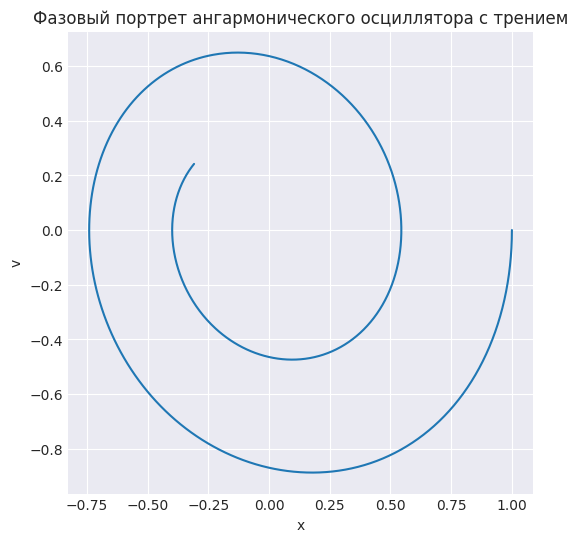

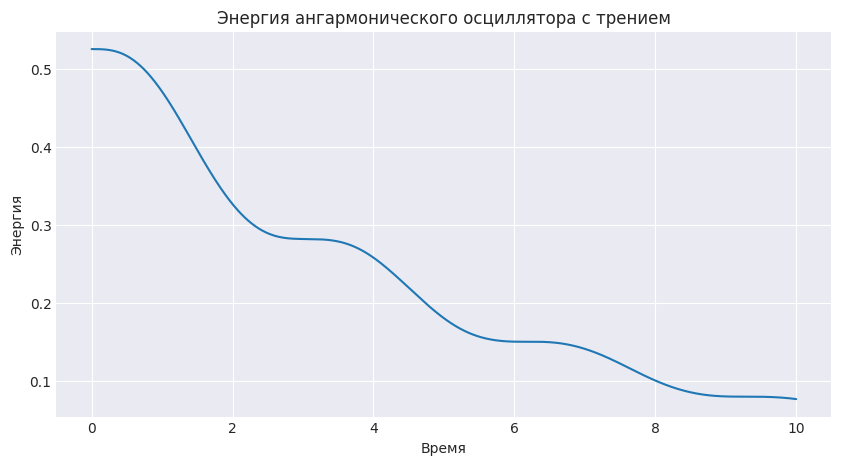

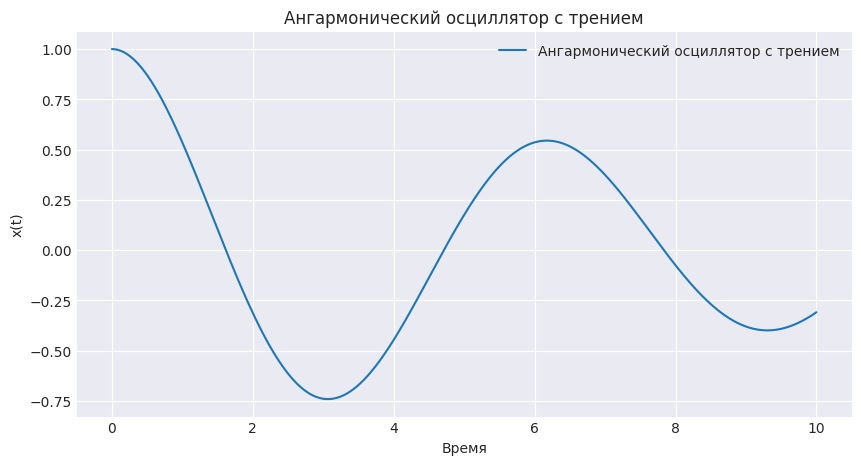

In [5]:
def damped_anharmonic_oscillator(t, y, omega, gamma, alpha):
    x, v = y
    dxdt = v
    dvdt = -2 * gamma * v - omega**2 * x - alpha * x**3
    return [dxdt, dvdt]

sol = solve_ivp(damped_anharmonic_oscillator, t_span, y0, args=(omega, gamma, alpha), dense_output=True)
x_vals, v_vals = sol.sol(t_vals)

# Построение фазового портрета
plt.figure(figsize=(6, 6))
plt.plot(x_vals, v_vals)
plt.xlabel('x')
plt.ylabel('v')
plt.title('Фазовый портрет ангармонического осциллятора с трением')
plt.grid(True)
plt.show()

# Энергия
energy = 0.5 * m * v_vals**2 + 0.5 * k * x_vals**2 + 0.25 * alpha * x_vals**4

plt.figure(figsize=(10, 5))
plt.plot(t_vals, energy)
plt.xlabel('Время')
plt.ylabel('Энергия')
plt.title('Энергия ангармонического осциллятора с трением')
plt.grid(True)
plt.show()

# Построение графика x(t)
x_vals = sol.sol(t_vals)[0]

plt.figure(figsize=(10, 5))
plt.plot(t_vals, x_vals, label='Ангармонический осциллятор с трением')
plt.xlabel('Время')
plt.ylabel('x(t)')
plt.title('Ангармонический осциллятор с трением')
plt.legend()
plt.show()